In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import datetime

In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('Resources/mainPop.csv')
df.head()

,ID,Cum GPA,TEAS Count,MaxOfTestScore,PrecEducDesc,failing grade count,DateStart,GradDate,Test Delivery Date,Time to Test (days),Completion Time (days),Grade,Qtr,Year
0,1,2.84,1.0,76.0,High School/GED/Some College,0,9/6/2016,4/20/2018,11/15/2018,209.00,591.0,Pass,2018-4,2018
1,2,3.14,1.0,74.7,High School/GED/Some College,0,9/10/2018,12/21/2019,3/3/2020,73.00,467.0,Pass,2020-1,2020
2,3,2.58,NaN,NaN,High School/GED/Some College,0,NaN,5/1/2009,3/29/2019,3619.34,39934.0,Pass,2019-1,2019
3,4,3.45,NaN,NaN,High School/GED/Some College,0,NaN,4/21/2017,5/27/2017,36.34,42846.0,Pass,2017-2,2017
4,5,3.22,1.0,75.3,High School/GED/Some College,0,5/18/2015,12/16/2016,3/10/2017,84.51,578.0,Pass,2017-1,2017


In [3]:
df.count()

ID                        1333
Cum GPA                   1333
TEAS Count                1225
MaxOfTestScore            1225
PrecEducDesc              1333
failing grade count       1333
DateStart                 1331
GradDate                  1333
Test Delivery Date        1333
Time to Test (days)       1333
Completion Time (days)    1333
Grade                     1333
Qtr                       1333
Year                      1333
dtype: int64

In [4]:
df = df.dropna(how='any')
df.count()


ID                        1225
Cum GPA                   1225
TEAS Count                1225
MaxOfTestScore            1225
PrecEducDesc              1225
failing grade count       1225
DateStart                 1225
GradDate                  1225
Test Delivery Date        1225
Time to Test (days)       1225
Completion Time (days)    1225
Grade                     1225
Qtr                       1225
Year                      1225
dtype: int64

In [5]:
# Reorganize columns to ready for preprocessing
df=df[["ID","Cum GPA", "TEAS Count","MaxOfTestScore","failing grade count","DateStart","GradDate","Test Delivery Date","Time to Test (days)","Completion Time (days)","Qtr","Year","PrecEducDesc","Grade"]]

In [6]:
model_df = df[["Cum GPA", "TEAS Count","MaxOfTestScore","failing grade count","Time to Test (days)","Completion Time (days)","PrecEducDesc","Grade"]]
model_df.head()

,Cum GPA,TEAS Count,MaxOfTestScore,failing grade count,Time to Test (days),Completion Time (days),PrecEducDesc,Grade
0,2.84,1.0,76.0,0,209.00,591.0,High School/GED/Some College,Pass
1,3.14,1.0,74.7,0,73.00,467.0,High School/GED/Some College,Pass
4,3.22,1.0,75.3,0,84.51,578.0,High School/GED/Some College,Pass
5,3.29,2.0,77.3,0,60.00,591.0,High School/GED/Some College,Fail
6,3.38,2.0,72.7,0,80.33,600.0,Associates,Pass


In [7]:
# Step 0: Reformat data
data = model_df.values
X = data[:, 0:6]
y = data[:, 6]

In [8]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [9]:
# for label, original_class in zip(encoded_y, y):
#     print('Original Class: ' + str(original_class))
#     print('Encoded Label: ' + str(label))
#     print('-' * 12)

In [10]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
one_hot_y

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [11]:
# Send education back to the dataframe
# A -> [0]
# B -> [1]
# Hs -> [2]
# M -> [3]

one_hot_ydf = pd.DataFrame(np.zeros((1225,4)),columns = ['Assoc','Bach','HighSchool','Masters'])
for i in range(len(one_hot_y)):
    for j in range(4):
        one_hot_ydf.iloc[i][j] = one_hot_y[i][j]
one_hot_ydf.dtypes

Assoc         float64
Bach          float64
HighSchool    float64
Masters       float64
dtype: object

In [12]:
model_df

,Cum GPA,TEAS Count,MaxOfTestScore,failing grade count,Time to Test (days),Completion Time (days),PrecEducDesc,Grade
0,2.84,1.0,76.0,0,209.00,591.0,High School/GED/Some College,Pass
1,3.14,1.0,74.7,0,73.00,467.0,High School/GED/Some College,Pass
4,3.22,1.0,75.3,0,84.51,578.0,High School/GED/Some College,Pass
5,3.29,2.0,77.3,0,60.00,591.0,High School/GED/Some College,Fail
6,3.38,2.0,72.7,0,80.33,600.0,Associates,Pass
...,...,...,...,...,...,...,...,...
1328,3.95,1.0,86.0,0,101.53,481.0,Bachelors,Pass
1329,3.64,1.0,77.3,0,27.00,481.0,Bachelors,Pass
1330,3.43,1.0,78.0,0,80.00,481.0,Bachelors,Pass
1331,3.43,1.0,88.0,0,72.00,481.0,Bachelors,Pass


In [13]:
# One-hot on Grade
model_df['GradePass'] = np.where(model_df['Grade']== 'Pass', 1., 0.)
# One-hot on Prev Edu
model_df['HighSchool'] = np.where(model_df['PrecEducDesc'] == 'High School/GED/Some College',1.,0.)
model_df['Assoc'] =  np.where(model_df['PrecEducDesc'] == 'Associates',1.,0.)
model_df['Bach'] = np.where(model_df['PrecEducDesc'] == 'Bachelors',1.,0.)
model_df['Masters'] = np.where(model_df['PrecEducDesc'] == 'Masters',1.,0.)

C:\Users\whall\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\whall\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\whall\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [14]:
#One big hot dataframe
# ['Assoc','Bach','HighSchool','Masters'])
# one_hot_ydf

model_df.tail(50)

,Cum GPA,TEAS Count,MaxOfTestScore,failing grade count,Time to Test (days),Completion Time (days),PrecEducDesc,Grade,GradePass,HighSchool,Assoc,Bach,Masters
1283,3.62,1.0,84.7,0,38.56,481.0,High School/GED/Some College,Pass,1.0,1.0,0.0,0.0,0.0
1284,3.24,1.0,66.0,0,91.00,474.0,High School/GED/Some College,Pass,1.0,1.0,0.0,0.0,0.0
1285,3.52,1.0,78.7,0,37.00,474.0,High School/GED/Some College,Pass,1.0,1.0,0.0,0.0,0.0
1286,3.24,1.0,70.7,0,44.00,600.0,Associates,Pass,1.0,0.0,1.0,0.0,0.0
1287,3.07,1.0,67.3,0,173.00,474.0,High School/GED/Some College,Pass,1.0,1.0,0.0,0.0,0.0
1288,3.91,1.0,89.3,0,88.00,474.0,Masters,Pass,1.0,0.0,0.0,0.0,1.0
1289,2.84,1.0,78.7,0,83.00,481.0,High School/GED/Some College,Pass,1.0,1.0,0.0,0.0,0.0
1290,2.60,1.0,70.0,0,75.00,600.0,Bachelors,Fail,0.0,0.0,0.0,1.0,0.0
1291,3.12,1.0,78.7,0,88.00,481.0,High School/GED/Some College,Fail,0.0,1.0,0.0,0.0,0.0
1292,3.69,1.0,75.3,0,91.00,474.0,Associates,Pass,1.0,0.0,1.0,0.0,0.0


In [15]:
# Assign the data to X and y

X = model_df[["Cum GPA", "TEAS Count","MaxOfTestScore","failing grade count","Time to Test (days)","Completion Time (days)",
        "HighSchool", "Assoc","Bach","Masters"]]

y = model_df["GradePass"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1225, 10) (1225, 1)


In [16]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### END SOLUTION

In [17]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [18]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.20576225097766632
Testing Score: 0.17327343017940633


Text(0.5, 1.0, 'Residual Plot')

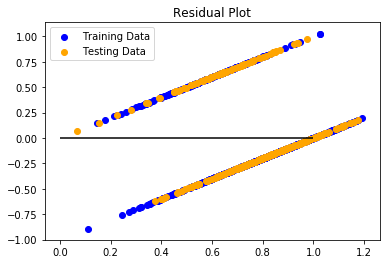

In [19]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [20]:
# model_df.to_csv("output_data/model_data.csv", encoding="utf-8", index=False)